In [1]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
path = './'
train = pd.read_csv(path+'input/train_set.csv')
test = pd.read_csv(path+'input/test_set.csv')
train.shape, test.shape

((25317, 18), (10852, 17))

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 17 columns):
ID           10852 non-null int64
age          10852 non-null int64
job          10852 non-null object
marital 

(None, None)

In [5]:
import matplotlib.pyplot as plt

(array([22356.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2961.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

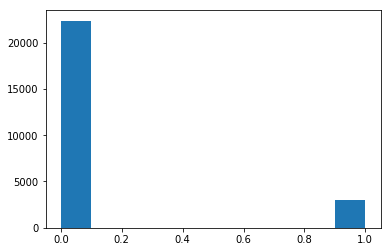

In [6]:
plt.hist(train['y'])

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [8]:
test['y'] = -1
data = train.append(test.reset_index(drop=True))

cat_col = [i for i in data.select_dtypes(object).columns if i not in ['ID', 'y']]
for i in cat_col:
#     data['count_' + i] = data.groupby([i])[i].transform('count')
    data[i] = LabelEncoder().fit_transform(data[i].astype(str))
    

(array([10852.,     0.,     0.,     0.,     0., 22356.,     0.,     0.,
            0.,  2961.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

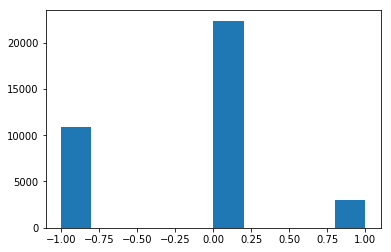

In [9]:
plt.hist(data['y'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36169 entries, 0 to 10851
Data columns (total 18 columns):
ID           36169 non-null int64
age          36169 non-null int64
job          36169 non-null int32
marital      36169 non-null int32
education    36169 non-null int32
default      36169 non-null int32
balance      36169 non-null int64
housing      36169 non-null int32
loan         36169 non-null int32
contact      36169 non-null int32
day          36169 non-null int64
month        36169 non-null int32
duration     36169 non-null int64
campaign     36169 non-null int64
pdays        36169 non-null int64
previous     36169 non-null int64
poutcome     36169 non-null int32
y            36169 non-null int64
dtypes: int32(9), int64(9)
memory usage: 4.0 MB


In [11]:
feats = [i for i in data.columns if i not in ['ID', 'y']]
feats

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [12]:
data_train_x = data[data['y'] != -1][feats]
data_train_y = data[data['y'] != -1]['y']
test_x = data[data['y'] == -1][feats]

train_x, valid_x, train_y, valid_y = train_test_split(data_train_x, data_train_y, test_size=0.3)
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, data_train_x.shape, data_train_y.shape

((17721, 16),
 (17721,),
 (7596, 16),
 (7596,),
 (10852, 16),
 (25317, 16),
 (25317,))

In [13]:
res=pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'auc'])
res

,accuracy,precision,recall,f1,auc


In [14]:
def measures(test_y, pred):    
    res = [[]]
    res[0].append(metrics.accuracy_score(test_y, pred))
    res[0].append(metrics.precision_score(test_y, pred))
    res[0].append(metrics.recall_score(test_y, pred))
    res[0].append(metrics.f1_score(test_y, pred))
    res[0].append(metrics.roc_auc_score(test_y, pred))
    
    print("accuracy      : %0.3f" % res[0][0])
    print("precision score: %0.3f" % res[0][1])
    print("recall score  : %0.3f" % res[0][2])
    print("f1 score      : %0.3f" % res[0][3])
    print("roc-auc score      : %0.3f" % res[0][4])
    data = pd.DataFrame(res, columns=['accuracy', 'precision', 'recall', 'f1', 'auc'])
    return data

In [15]:
model = lgb.LGBMClassifier( boosting_type="gbdt", num_leaves=30, reg_alpha=0, reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary',metric= 'auc',
    subsample=0.95, colsample_bytree=0.7, subsample_freq=1,
    learning_rate=0.02, random_state=2017)

model.fit(train_x, train_y)
valid_pre = model.predict(valid_x)
res = res.append(measures(valid_y, valid_pre)).reset_index(drop=True)

accuracy      : 0.907
precision score: 0.635
recall score  : 0.479
f1 score      : 0.546
roc-auc score      : 0.721


In [16]:
model = lgb.LGBMClassifier(learning_rate=0.4)

model.fit(train_x, train_y)
valid_pre = model.predict(valid_x)
res = res.append(measures(valid_y, valid_pre)).reset_index(drop=True)

res

accuracy      : 0.902
precision score: 0.597
recall score  : 0.478
f1 score      : 0.531
roc-auc score      : 0.718


,accuracy,precision,recall,f1,auc
0,0.907188,0.634731,0.479096,0.546040,0.721369
1,0.901659,0.597458,0.477966,0.531073,0.717749


#### 最好记录

In [21]:
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
train_x = data[data['y']!=-1][feats]
train_y = data[data['y']!=-1]['y']

test_x = data[data['y'] == -1][feats]
res=data[data['y']==-1][['ID']]
res['pred'] = 0

model = lgb.LGBMClassifier(learning_rate=0.4, random_state=42)

for train_idx, val_idx in kfold.split(train_y):
    model.random_state = model.random_state + 1
    train_x1 = train_x.loc[train_idx]
    train_y1 = train_y.loc[train_idx]
    valid_x1 = train_x.loc[val_idx]
    valid_y1 = train_y.loc[val_idx]
    
    model.fit(train_x1, train_y1, eval_set=[(train_x1, train_y1),(valid_x1, valid_y1)],
              eval_metric='auc',early_stopping_rounds=100)
    res['pred'] += model.predict_proba(test_x)[:,1]
res['pred'] = res['pred']/10


[1]	training's auc: 0.884754	training's binary_logloss: 0.261636	valid_1's auc: 0.878158	valid_1's binary_logloss: 0.267167
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.917637	training's binary_logloss: 0.237429	valid_1's auc: 0.908514	valid_1's binary_logloss: 0.246079
[3]	training's auc: 0.925015	training's binary_logloss: 0.223156	valid_1's auc: 0.917035	valid_1's binary_logloss: 0.233798
[4]	training's auc: 0.928417	training's binary_logloss: 0.213841	valid_1's auc: 0.915733	valid_1's binary_logloss: 0.22809
[5]	training's auc: 0.930865	training's binary_logloss: 0.207044	valid_1's auc: 0.914413	valid_1's binary_logloss: 0.225264
[6]	training's auc: 0.934395	training's binary_logloss: 0.200812	valid_1's auc: 0.917184	valid_1's binary_logloss: 0.220992
[7]	training's auc: 0.937646	training's binary_logloss: 0.196425	valid_1's auc: 0.914357	valid_1's binary_logloss: 0.222881
[8]	training's auc: 0.939942	training's binary_logloss: 0.192192	valid_

[84]	training's auc: 0.992763	training's binary_logloss: 0.0882725	valid_1's auc: 0.913853	valid_1's binary_logloss: 0.266903
[85]	training's auc: 0.99307	training's binary_logloss: 0.0873698	valid_1's auc: 0.913902	valid_1's binary_logloss: 0.267164
[86]	training's auc: 0.993356	training's binary_logloss: 0.086368	valid_1's auc: 0.913688	valid_1's binary_logloss: 0.267771
[87]	training's auc: 0.993559	training's binary_logloss: 0.0854541	valid_1's auc: 0.913704	valid_1's binary_logloss: 0.268168
[88]	training's auc: 0.994022	training's binary_logloss: 0.0843196	valid_1's auc: 0.913787	valid_1's binary_logloss: 0.268001
[89]	training's auc: 0.994232	training's binary_logloss: 0.0834373	valid_1's auc: 0.913743	valid_1's binary_logloss: 0.268151
[90]	training's auc: 0.994421	training's binary_logloss: 0.0826594	valid_1's auc: 0.913899	valid_1's binary_logloss: 0.268161
[91]	training's auc: 0.994587	training's binary_logloss: 0.0818684	valid_1's auc: 0.914006	valid_1's binary_logloss: 0.2

[54]	training's auc: 0.984544	training's binary_logloss: 0.114933	valid_1's auc: 0.923485	valid_1's binary_logloss: 0.227822
[55]	training's auc: 0.985189	training's binary_logloss: 0.112749	valid_1's auc: 0.924386	valid_1's binary_logloss: 0.227246
[56]	training's auc: 0.985467	training's binary_logloss: 0.11196	valid_1's auc: 0.924154	valid_1's binary_logloss: 0.227561
[57]	training's auc: 0.985631	training's binary_logloss: 0.111415	valid_1's auc: 0.923662	valid_1's binary_logloss: 0.228314
[58]	training's auc: 0.985933	training's binary_logloss: 0.110588	valid_1's auc: 0.923238	valid_1's binary_logloss: 0.228709
[59]	training's auc: 0.986262	training's binary_logloss: 0.109706	valid_1's auc: 0.923098	valid_1's binary_logloss: 0.229238
[60]	training's auc: 0.986636	training's binary_logloss: 0.108617	valid_1's auc: 0.923489	valid_1's binary_logloss: 0.228995
[61]	training's auc: 0.98714	training's binary_logloss: 0.107336	valid_1's auc: 0.922858	valid_1's binary_logloss: 0.229834
[6

[63]	training's auc: 0.987163	training's binary_logloss: 0.106004	valid_1's auc: 0.921864	valid_1's binary_logloss: 0.22012
[64]	training's auc: 0.987484	training's binary_logloss: 0.105133	valid_1's auc: 0.921263	valid_1's binary_logloss: 0.22142
[65]	training's auc: 0.987815	training's binary_logloss: 0.104261	valid_1's auc: 0.920923	valid_1's binary_logloss: 0.222356
[66]	training's auc: 0.98802	training's binary_logloss: 0.103599	valid_1's auc: 0.921173	valid_1's binary_logloss: 0.221966
[67]	training's auc: 0.988277	training's binary_logloss: 0.102719	valid_1's auc: 0.9211	valid_1's binary_logloss: 0.22223
[68]	training's auc: 0.988551	training's binary_logloss: 0.101883	valid_1's auc: 0.921026	valid_1's binary_logloss: 0.222781
[69]	training's auc: 0.988863	training's binary_logloss: 0.100827	valid_1's auc: 0.920273	valid_1's binary_logloss: 0.224039
[70]	training's auc: 0.98927	training's binary_logloss: 0.0997931	valid_1's auc: 0.919647	valid_1's binary_logloss: 0.224797
[71]	t

[60]	training's auc: 0.987837	training's binary_logloss: 0.104653	valid_1's auc: 0.911574	valid_1's binary_logloss: 0.244111
[61]	training's auc: 0.988338	training's binary_logloss: 0.103742	valid_1's auc: 0.910764	valid_1's binary_logloss: 0.245206
[62]	training's auc: 0.988858	training's binary_logloss: 0.102666	valid_1's auc: 0.910505	valid_1's binary_logloss: 0.245619
[63]	training's auc: 0.989357	training's binary_logloss: 0.101433	valid_1's auc: 0.910869	valid_1's binary_logloss: 0.245168
[64]	training's auc: 0.989625	training's binary_logloss: 0.100423	valid_1's auc: 0.910875	valid_1's binary_logloss: 0.245417
[65]	training's auc: 0.989814	training's binary_logloss: 0.0995742	valid_1's auc: 0.910225	valid_1's binary_logloss: 0.246592
[66]	training's auc: 0.990101	training's binary_logloss: 0.0986996	valid_1's auc: 0.910106	valid_1's binary_logloss: 0.246988
[67]	training's auc: 0.990533	training's binary_logloss: 0.0974753	valid_1's auc: 0.91019	valid_1's binary_logloss: 0.24687

[56]	training's auc: 0.979591	training's binary_logloss: 0.162595	valid_1's auc: 0.923987	valid_1's binary_logloss: 0.248311
[57]	training's auc: 0.980607	training's binary_logloss: 0.139941	valid_1's auc: 0.924666	valid_1's binary_logloss: 0.234152
[58]	training's auc: 0.98102	training's binary_logloss: 0.13754	valid_1's auc: 0.925089	valid_1's binary_logloss: 0.220586
[59]	training's auc: 0.980555	training's binary_logloss: 0.168262	valid_1's auc: 0.925179	valid_1's binary_logloss: 0.220043
[60]	training's auc: 0.982421	training's binary_logloss: 0.121778	valid_1's auc: 0.92567	valid_1's binary_logloss: 0.206976
[61]	training's auc: 0.981201	training's binary_logloss: 0.175215	valid_1's auc: 0.923197	valid_1's binary_logloss: 0.275619
[62]	training's auc: 0.98297	training's binary_logloss: 0.133316	valid_1's auc: 0.924457	valid_1's binary_logloss: 0.22202
[63]	training's auc: 0.981895	training's binary_logloss: 0.177832	valid_1's auc: 0.921788	valid_1's binary_logloss: 0.291094
[64]	

[57]	training's auc: 0.985489	training's binary_logloss: 0.112206	valid_1's auc: 0.92387	valid_1's binary_logloss: 0.212866
[58]	training's auc: 0.985815	training's binary_logloss: 0.111326	valid_1's auc: 0.923769	valid_1's binary_logloss: 0.213333
[59]	training's auc: 0.986095	training's binary_logloss: 0.110663	valid_1's auc: 0.924531	valid_1's binary_logloss: 0.211779
[60]	training's auc: 0.986396	training's binary_logloss: 0.109811	valid_1's auc: 0.924499	valid_1's binary_logloss: 0.212173
[61]	training's auc: 0.986856	training's binary_logloss: 0.108761	valid_1's auc: 0.924302	valid_1's binary_logloss: 0.212626
[62]	training's auc: 0.986255	training's binary_logloss: 0.110491	valid_1's auc: 0.924066	valid_1's binary_logloss: 0.213188
[63]	training's auc: 0.987371	training's binary_logloss: 0.107715	valid_1's auc: 0.92391	valid_1's binary_logloss: 0.213698
[64]	training's auc: 0.987574	training's binary_logloss: 0.107021	valid_1's auc: 0.924192	valid_1's binary_logloss: 0.213657
[6

[64]	training's auc: 0.988137	training's binary_logloss: 0.104143	valid_1's auc: 0.920136	valid_1's binary_logloss: 0.233625
[65]	training's auc: 0.988712	training's binary_logloss: 0.102923	valid_1's auc: 0.920488	valid_1's binary_logloss: 0.232972
[66]	training's auc: 0.98908	training's binary_logloss: 0.101862	valid_1's auc: 0.920483	valid_1's binary_logloss: 0.232774
[67]	training's auc: 0.989413	training's binary_logloss: 0.10075	valid_1's auc: 0.920019	valid_1's binary_logloss: 0.234302
[68]	training's auc: 0.989618	training's binary_logloss: 0.0999478	valid_1's auc: 0.91931	valid_1's binary_logloss: 0.235375
[69]	training's auc: 0.990264	training's binary_logloss: 0.0987287	valid_1's auc: 0.918862	valid_1's binary_logloss: 0.235992
[70]	training's auc: 0.990536	training's binary_logloss: 0.0976918	valid_1's auc: 0.919121	valid_1's binary_logloss: 0.236034
[71]	training's auc: 0.990797	training's binary_logloss: 0.096725	valid_1's auc: 0.919367	valid_1's binary_logloss: 0.236153


[61]	training's auc: 0.98659	training's binary_logloss: 0.109124	valid_1's auc: 0.919333	valid_1's binary_logloss: 0.217754
[62]	training's auc: 0.98676	training's binary_logloss: 0.108507	valid_1's auc: 0.919277	valid_1's binary_logloss: 0.218265
[63]	training's auc: 0.987341	training's binary_logloss: 0.107278	valid_1's auc: 0.918814	valid_1's binary_logloss: 0.21856
[64]	training's auc: 0.987719	training's binary_logloss: 0.106164	valid_1's auc: 0.91887	valid_1's binary_logloss: 0.218421
[65]	training's auc: 0.988072	training's binary_logloss: 0.105251	valid_1's auc: 0.918873	valid_1's binary_logloss: 0.218408
[66]	training's auc: 0.988394	training's binary_logloss: 0.104394	valid_1's auc: 0.919391	valid_1's binary_logloss: 0.217739
[67]	training's auc: 0.988662	training's binary_logloss: 0.103473	valid_1's auc: 0.919676	valid_1's binary_logloss: 0.21796
[68]	training's auc: 0.989028	training's binary_logloss: 0.10244	valid_1's auc: 0.920201	valid_1's binary_logloss: 0.217733
[69]	t

[63]	training's auc: 0.987809	training's binary_logloss: 0.104321	valid_1's auc: 0.919064	valid_1's binary_logloss: 0.239724
[64]	training's auc: 0.988121	training's binary_logloss: 0.103433	valid_1's auc: 0.918851	valid_1's binary_logloss: 0.240124
[65]	training's auc: 0.988658	training's binary_logloss: 0.102035	valid_1's auc: 0.91899	valid_1's binary_logloss: 0.240086
[66]	training's auc: 0.988845	training's binary_logloss: 0.10142	valid_1's auc: 0.919273	valid_1's binary_logloss: 0.239655
[67]	training's auc: 0.988982	training's binary_logloss: 0.100868	valid_1's auc: 0.918998	valid_1's binary_logloss: 0.240132
[68]	training's auc: 0.989416	training's binary_logloss: 0.099533	valid_1's auc: 0.918405	valid_1's binary_logloss: 0.24156
[69]	training's auc: 0.989659	training's binary_logloss: 0.0987159	valid_1's auc: 0.918282	valid_1's binary_logloss: 0.242353
[70]	training's auc: 0.989929	training's binary_logloss: 0.0978068	valid_1's auc: 0.917868	valid_1's binary_logloss: 0.243635
[

[62]	training's auc: 0.985137	training's binary_logloss: 0.141918	valid_1's auc: 0.908442	valid_1's binary_logloss: 0.263914
[63]	training's auc: 0.986289	training's binary_logloss: 0.117876	valid_1's auc: 0.90969	valid_1's binary_logloss: 0.249865
[64]	training's auc: 0.986425	training's binary_logloss: 0.121285	valid_1's auc: 0.90845	valid_1's binary_logloss: 0.260776
[65]	training's auc: 0.986578	training's binary_logloss: 0.109289	valid_1's auc: 0.909398	valid_1's binary_logloss: 0.250546
[66]	training's auc: 0.987136	training's binary_logloss: 0.109506	valid_1's auc: 0.909584	valid_1's binary_logloss: 0.250415
[67]	training's auc: 0.98751	training's binary_logloss: 0.106683	valid_1's auc: 0.909258	valid_1's binary_logloss: 0.251502
[68]	training's auc: 0.987806	training's binary_logloss: 0.108518	valid_1's auc: 0.908658	valid_1's binary_logloss: 0.2528
[69]	training's auc: 0.988534	training's binary_logloss: 0.104751	valid_1's auc: 0.908987	valid_1's binary_logloss: 0.25273
[70]	t

In [22]:
valid_pre = model.predict(valid_x)
measures(valid_y, valid_pre)

accuracy      : 0.969
precision score: 0.913
recall score  : 0.811
f1 score      : 0.859
roc-auc score      : 0.901


,accuracy,precision,recall,f1,auc
0,0.969063,0.913486,0.811299,0.859366,0.900583


In [24]:
res.to_csv('/python/datasource/submisission.csv', index=False)

In [99]:
len(data)

3

In [86]:
plt.plot(range(len(res)), res[])

[[0.968667719852554,
  0.9384615384615385,
  0.7757225433526012,
  0.849367088607595],
 [0.968667719852554,
  0.9384615384615385,
  0.7757225433526012,
  0.849367088607595],
 [0.968667719852554,
  0.9384615384615385,
  0.7757225433526012,
  0.849367088607595]]

In [89]:
res[:][2]

[0.968667719852554, 0.9384615384615385, 0.7757225433526012, 0.849367088607595]

In [20]:
lgb.LGBMClassifier?

In [18]:
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
train_x = data[data['y']!=-1][feats]
train_y = data[data['y']!=-1]['y']

test_x = data[data['y'] == -1][feats]
res=data[data['y']==-1][['ID']]
res['pred'] = 0

model = lgb.LGBMClassifier( boosting_type="gbdt", num_leaves=30, reg_alpha=0, reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary',metric= 'auc',
    subsample=0.95, colsample_bytree=0.7, subsample_freq=1,
    learning_rate=0.02, random_state=2017)

for train_idx, val_idx in kfold.split(train_y):
    model.random_state = model.random_state + 1
    train_x1 = train_x.loc[train_idx]
    train_y1 = train_y.loc[train_idx]
    valid_x1 = train_x.loc[val_idx]
    valid_y1 = train_y.loc[val_idx]
    
    model.fit(train_x1, train_y1, eval_set=[(train_x1, train_y1),(valid_x1, valid_y1)],
              eval_metric='auc',early_stopping_rounds=100)
    res['pred'] += model.predict_proba(test_x)[:,1]
res['pred'] = res['pred']/10


[1]	training's auc: 0.762899	valid_1's auc: 0.768987
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.90627	valid_1's auc: 0.896486
[3]	training's auc: 0.911555	valid_1's auc: 0.900981
[4]	training's auc: 0.914657	valid_1's auc: 0.902713
[5]	training's auc: 0.915198	valid_1's auc: 0.902882
[6]	training's auc: 0.915734	valid_1's auc: 0.903371
[7]	training's auc: 0.92109	valid_1's auc: 0.906989
[8]	training's auc: 0.92212	valid_1's auc: 0.906657
[9]	training's auc: 0.9233	valid_1's auc: 0.90894
[10]	training's auc: 0.924704	valid_1's auc: 0.911295
[11]	training's auc: 0.924984	valid_1's auc: 0.911773
[12]	training's auc: 0.925789	valid_1's auc: 0.913341
[13]	training's auc: 0.92716	valid_1's auc: 0.916488
[14]	training's auc: 0.9277	valid_1's auc: 0.917523
[15]	training's auc: 0.928328	valid_1's auc: 0.917529
[16]	training's auc: 0.928891	valid_1's auc: 0.917914
[17]	training's auc: 0.929869	valid_1's auc: 0.918011
[18]	training's auc: 0.931308	valid_1'

[154]	training's auc: 0.945895	valid_1's auc: 0.925817
[155]	training's auc: 0.946096	valid_1's auc: 0.926012
[156]	training's auc: 0.946237	valid_1's auc: 0.926171
[157]	training's auc: 0.946301	valid_1's auc: 0.926112
[158]	training's auc: 0.946436	valid_1's auc: 0.926286
[159]	training's auc: 0.946503	valid_1's auc: 0.92619
[160]	training's auc: 0.946608	valid_1's auc: 0.926252
[161]	training's auc: 0.946675	valid_1's auc: 0.926205
[162]	training's auc: 0.94685	valid_1's auc: 0.926432
[163]	training's auc: 0.947002	valid_1's auc: 0.926528
[164]	training's auc: 0.947081	valid_1's auc: 0.926575
[165]	training's auc: 0.947404	valid_1's auc: 0.926922
[166]	training's auc: 0.947492	valid_1's auc: 0.926924
[167]	training's auc: 0.947529	valid_1's auc: 0.926928
[168]	training's auc: 0.94761	valid_1's auc: 0.92696
[169]	training's auc: 0.947962	valid_1's auc: 0.927395
[170]	training's auc: 0.948002	valid_1's auc: 0.927308
[171]	training's auc: 0.948117	valid_1's auc: 0.927355
[172]	training

[307]	training's auc: 0.959571	valid_1's auc: 0.931759
[308]	training's auc: 0.959642	valid_1's auc: 0.931751
[309]	training's auc: 0.959744	valid_1's auc: 0.931913
[310]	training's auc: 0.959795	valid_1's auc: 0.931865
[311]	training's auc: 0.959889	valid_1's auc: 0.931856
[312]	training's auc: 0.959937	valid_1's auc: 0.931851
[313]	training's auc: 0.959998	valid_1's auc: 0.931922
[314]	training's auc: 0.960055	valid_1's auc: 0.931903
[315]	training's auc: 0.960105	valid_1's auc: 0.931951
[316]	training's auc: 0.960172	valid_1's auc: 0.931923
[317]	training's auc: 0.960203	valid_1's auc: 0.931847
[318]	training's auc: 0.96026	valid_1's auc: 0.931879
[319]	training's auc: 0.960333	valid_1's auc: 0.931894
[320]	training's auc: 0.960386	valid_1's auc: 0.931859
[321]	training's auc: 0.960473	valid_1's auc: 0.931982
[322]	training's auc: 0.960534	valid_1's auc: 0.932029
[323]	training's auc: 0.960589	valid_1's auc: 0.932019
[324]	training's auc: 0.960656	valid_1's auc: 0.932
[325]	training

[460]	training's auc: 0.968366	valid_1's auc: 0.93254
[461]	training's auc: 0.968408	valid_1's auc: 0.932536
[462]	training's auc: 0.968453	valid_1's auc: 0.932536
[463]	training's auc: 0.9685	valid_1's auc: 0.93253
[464]	training's auc: 0.968567	valid_1's auc: 0.932543
[465]	training's auc: 0.968633	valid_1's auc: 0.932536
[466]	training's auc: 0.968687	valid_1's auc: 0.932536
[467]	training's auc: 0.968737	valid_1's auc: 0.93248
[468]	training's auc: 0.968779	valid_1's auc: 0.932533
[469]	training's auc: 0.968842	valid_1's auc: 0.932539
[470]	training's auc: 0.968883	valid_1's auc: 0.932576
[471]	training's auc: 0.968923	valid_1's auc: 0.932607
[472]	training's auc: 0.968972	valid_1's auc: 0.93259
[473]	training's auc: 0.969004	valid_1's auc: 0.93264
[474]	training's auc: 0.969054	valid_1's auc: 0.932635
[475]	training's auc: 0.969089	valid_1's auc: 0.932639
[476]	training's auc: 0.969128	valid_1's auc: 0.932589
[477]	training's auc: 0.969173	valid_1's auc: 0.932577
[478]	training's 

[614]	training's auc: 0.974934	valid_1's auc: 0.933304
[615]	training's auc: 0.974953	valid_1's auc: 0.933329
[616]	training's auc: 0.974996	valid_1's auc: 0.933332
[617]	training's auc: 0.975024	valid_1's auc: 0.933343
[618]	training's auc: 0.975055	valid_1's auc: 0.933399
[619]	training's auc: 0.975096	valid_1's auc: 0.9334
[620]	training's auc: 0.975139	valid_1's auc: 0.933394
[621]	training's auc: 0.975174	valid_1's auc: 0.93343
[622]	training's auc: 0.975204	valid_1's auc: 0.933403
[623]	training's auc: 0.97524	valid_1's auc: 0.933404
[624]	training's auc: 0.97528	valid_1's auc: 0.933416
[625]	training's auc: 0.975313	valid_1's auc: 0.933413
[626]	training's auc: 0.975355	valid_1's auc: 0.933403
[627]	training's auc: 0.975394	valid_1's auc: 0.933381
[628]	training's auc: 0.975436	valid_1's auc: 0.933338
[629]	training's auc: 0.975482	valid_1's auc: 0.933346
[630]	training's auc: 0.975537	valid_1's auc: 0.933347
[631]	training's auc: 0.975563	valid_1's auc: 0.933325
[632]	training'

[44]	training's auc: 0.931247	valid_1's auc: 0.933393
[45]	training's auc: 0.932046	valid_1's auc: 0.933844
[46]	training's auc: 0.932075	valid_1's auc: 0.933973
[47]	training's auc: 0.932068	valid_1's auc: 0.933967
[48]	training's auc: 0.932252	valid_1's auc: 0.934005
[49]	training's auc: 0.932484	valid_1's auc: 0.933969
[50]	training's auc: 0.9336	valid_1's auc: 0.934323
[51]	training's auc: 0.933563	valid_1's auc: 0.934221
[52]	training's auc: 0.933513	valid_1's auc: 0.934213
[53]	training's auc: 0.933908	valid_1's auc: 0.934544
[54]	training's auc: 0.933999	valid_1's auc: 0.934567
[55]	training's auc: 0.934074	valid_1's auc: 0.934742
[56]	training's auc: 0.934612	valid_1's auc: 0.934893
[57]	training's auc: 0.934647	valid_1's auc: 0.934899
[58]	training's auc: 0.934645	valid_1's auc: 0.934953
[59]	training's auc: 0.934747	valid_1's auc: 0.934767
[60]	training's auc: 0.934776	valid_1's auc: 0.934882
[61]	training's auc: 0.934699	valid_1's auc: 0.934674
[62]	training's auc: 0.934748	

[197]	training's auc: 0.950664	valid_1's auc: 0.940768
[198]	training's auc: 0.950832	valid_1's auc: 0.940875
[199]	training's auc: 0.950863	valid_1's auc: 0.940908
[200]	training's auc: 0.951019	valid_1's auc: 0.941013
[201]	training's auc: 0.951111	valid_1's auc: 0.941007
[202]	training's auc: 0.951268	valid_1's auc: 0.941102
[203]	training's auc: 0.951412	valid_1's auc: 0.941147
[204]	training's auc: 0.951481	valid_1's auc: 0.941187
[205]	training's auc: 0.951561	valid_1's auc: 0.941165
[206]	training's auc: 0.95171	valid_1's auc: 0.941277
[207]	training's auc: 0.951793	valid_1's auc: 0.941262
[208]	training's auc: 0.951838	valid_1's auc: 0.94122
[209]	training's auc: 0.951919	valid_1's auc: 0.941204
[210]	training's auc: 0.951994	valid_1's auc: 0.941224
[211]	training's auc: 0.952068	valid_1's auc: 0.941212
[212]	training's auc: 0.952145	valid_1's auc: 0.941187
[213]	training's auc: 0.952241	valid_1's auc: 0.941182
[214]	training's auc: 0.952323	valid_1's auc: 0.941217
[215]	traini

[347]	training's auc: 0.961888	valid_1's auc: 0.942452
[348]	training's auc: 0.961942	valid_1's auc: 0.942497
[349]	training's auc: 0.96203	valid_1's auc: 0.942496
[350]	training's auc: 0.962065	valid_1's auc: 0.942446
[351]	training's auc: 0.962141	valid_1's auc: 0.942468
[352]	training's auc: 0.962208	valid_1's auc: 0.942435
[353]	training's auc: 0.962281	valid_1's auc: 0.942433
[354]	training's auc: 0.962356	valid_1's auc: 0.942447
[355]	training's auc: 0.962427	valid_1's auc: 0.942413
[356]	training's auc: 0.962504	valid_1's auc: 0.942489
[357]	training's auc: 0.962544	valid_1's auc: 0.942471
[358]	training's auc: 0.962622	valid_1's auc: 0.942482
[359]	training's auc: 0.962678	valid_1's auc: 0.942455
[360]	training's auc: 0.96274	valid_1's auc: 0.942433
[361]	training's auc: 0.962795	valid_1's auc: 0.942415
[362]	training's auc: 0.962871	valid_1's auc: 0.942435
[363]	training's auc: 0.962934	valid_1's auc: 0.942392
[364]	training's auc: 0.962988	valid_1's auc: 0.942381
[365]	traini

[66]	training's auc: 0.939179	valid_1's auc: 0.928104
[67]	training's auc: 0.939398	valid_1's auc: 0.928156
[68]	training's auc: 0.939513	valid_1's auc: 0.928276
[69]	training's auc: 0.939541	valid_1's auc: 0.928198
[70]	training's auc: 0.939615	valid_1's auc: 0.928118
[71]	training's auc: 0.939714	valid_1's auc: 0.928282
[72]	training's auc: 0.940078	valid_1's auc: 0.928477
[73]	training's auc: 0.940186	valid_1's auc: 0.928438
[74]	training's auc: 0.940265	valid_1's auc: 0.92847
[75]	training's auc: 0.940339	valid_1's auc: 0.928428
[76]	training's auc: 0.940353	valid_1's auc: 0.928378
[77]	training's auc: 0.940405	valid_1's auc: 0.928387
[78]	training's auc: 0.9405	valid_1's auc: 0.928396
[79]	training's auc: 0.940546	valid_1's auc: 0.928557
[80]	training's auc: 0.940744	valid_1's auc: 0.92889
[81]	training's auc: 0.940694	valid_1's auc: 0.92889
[82]	training's auc: 0.94071	valid_1's auc: 0.928812
[83]	training's auc: 0.940669	valid_1's auc: 0.928974
[84]	training's auc: 0.940838	vali

[221]	training's auc: 0.953856	valid_1's auc: 0.934092
[222]	training's auc: 0.95393	valid_1's auc: 0.934138
[223]	training's auc: 0.954029	valid_1's auc: 0.934123
[224]	training's auc: 0.954122	valid_1's auc: 0.934107
[225]	training's auc: 0.954183	valid_1's auc: 0.934098
[226]	training's auc: 0.954258	valid_1's auc: 0.934121
[227]	training's auc: 0.954298	valid_1's auc: 0.934091
[228]	training's auc: 0.954344	valid_1's auc: 0.934031
[229]	training's auc: 0.954405	valid_1's auc: 0.934013
[230]	training's auc: 0.954452	valid_1's auc: 0.933967
[231]	training's auc: 0.954517	valid_1's auc: 0.933939
[232]	training's auc: 0.954591	valid_1's auc: 0.933985
[233]	training's auc: 0.954686	valid_1's auc: 0.934005
[234]	training's auc: 0.954779	valid_1's auc: 0.934023
[235]	training's auc: 0.954845	valid_1's auc: 0.934025
[236]	training's auc: 0.954915	valid_1's auc: 0.934075
[237]	training's auc: 0.954976	valid_1's auc: 0.934094
[238]	training's auc: 0.955057	valid_1's auc: 0.934123
[239]	train

[372]	training's auc: 0.963789	valid_1's auc: 0.935485
[373]	training's auc: 0.963839	valid_1's auc: 0.935494
[374]	training's auc: 0.963879	valid_1's auc: 0.935508
[375]	training's auc: 0.963916	valid_1's auc: 0.935477
[376]	training's auc: 0.963974	valid_1's auc: 0.935528
[377]	training's auc: 0.964007	valid_1's auc: 0.935506
[378]	training's auc: 0.964046	valid_1's auc: 0.93554
[379]	training's auc: 0.964093	valid_1's auc: 0.935483
[380]	training's auc: 0.964131	valid_1's auc: 0.935508
[381]	training's auc: 0.964171	valid_1's auc: 0.935479
[382]	training's auc: 0.964227	valid_1's auc: 0.935519
[383]	training's auc: 0.964282	valid_1's auc: 0.935529
[384]	training's auc: 0.964344	valid_1's auc: 0.935566
[385]	training's auc: 0.964408	valid_1's auc: 0.935603
[386]	training's auc: 0.964455	valid_1's auc: 0.935612
[387]	training's auc: 0.964493	valid_1's auc: 0.935629
[388]	training's auc: 0.964529	valid_1's auc: 0.935626
[389]	training's auc: 0.964578	valid_1's auc: 0.935613
[390]	train

[523]	training's auc: 0.970942	valid_1's auc: 0.935577
[524]	training's auc: 0.970984	valid_1's auc: 0.935633
[525]	training's auc: 0.971033	valid_1's auc: 0.935624
[526]	training's auc: 0.971075	valid_1's auc: 0.935583
[527]	training's auc: 0.971134	valid_1's auc: 0.935545
[528]	training's auc: 0.97118	valid_1's auc: 0.935561
[529]	training's auc: 0.971203	valid_1's auc: 0.93559
[530]	training's auc: 0.971236	valid_1's auc: 0.935563
[531]	training's auc: 0.971273	valid_1's auc: 0.935499
[532]	training's auc: 0.971292	valid_1's auc: 0.935473
[533]	training's auc: 0.971355	valid_1's auc: 0.935528
[534]	training's auc: 0.971402	valid_1's auc: 0.935525
[535]	training's auc: 0.971459	valid_1's auc: 0.935538
[536]	training's auc: 0.971505	valid_1's auc: 0.935584
[537]	training's auc: 0.971551	valid_1's auc: 0.93559
[538]	training's auc: 0.971579	valid_1's auc: 0.935569
[539]	training's auc: 0.971664	valid_1's auc: 0.935525
[540]	training's auc: 0.971698	valid_1's auc: 0.9355
[541]	training'

[67]	training's auc: 0.938821	valid_1's auc: 0.9206
[68]	training's auc: 0.938926	valid_1's auc: 0.920964
[69]	training's auc: 0.939121	valid_1's auc: 0.920942
[70]	training's auc: 0.939212	valid_1's auc: 0.921013
[71]	training's auc: 0.93956	valid_1's auc: 0.921269
[72]	training's auc: 0.939872	valid_1's auc: 0.921423
[73]	training's auc: 0.939983	valid_1's auc: 0.921557
[74]	training's auc: 0.940098	valid_1's auc: 0.921406
[75]	training's auc: 0.940138	valid_1's auc: 0.921292
[76]	training's auc: 0.940545	valid_1's auc: 0.921526
[77]	training's auc: 0.940656	valid_1's auc: 0.921655
[78]	training's auc: 0.940883	valid_1's auc: 0.921685
[79]	training's auc: 0.940918	valid_1's auc: 0.921631
[80]	training's auc: 0.941002	valid_1's auc: 0.92173
[81]	training's auc: 0.941048	valid_1's auc: 0.921599
[82]	training's auc: 0.941108	valid_1's auc: 0.921535
[83]	training's auc: 0.9411	valid_1's auc: 0.921493
[84]	training's auc: 0.941106	valid_1's auc: 0.921434
[85]	training's auc: 0.941421	vali

[219]	training's auc: 0.954519	valid_1's auc: 0.925911
[220]	training's auc: 0.954555	valid_1's auc: 0.925862
[221]	training's auc: 0.954654	valid_1's auc: 0.925865
[222]	training's auc: 0.954734	valid_1's auc: 0.925898
[223]	training's auc: 0.954796	valid_1's auc: 0.925805
[224]	training's auc: 0.954873	valid_1's auc: 0.925811
[225]	training's auc: 0.954972	valid_1's auc: 0.925849
[226]	training's auc: 0.955045	valid_1's auc: 0.925917
[227]	training's auc: 0.955124	valid_1's auc: 0.926005
[228]	training's auc: 0.955167	valid_1's auc: 0.925992
[229]	training's auc: 0.955205	valid_1's auc: 0.926065
[230]	training's auc: 0.955279	valid_1's auc: 0.926042
[231]	training's auc: 0.955323	valid_1's auc: 0.926011
[232]	training's auc: 0.95539	valid_1's auc: 0.926051
[233]	training's auc: 0.955427	valid_1's auc: 0.926077
[234]	training's auc: 0.955498	valid_1's auc: 0.926012
[235]	training's auc: 0.955596	valid_1's auc: 0.92599
[236]	training's auc: 0.955625	valid_1's auc: 0.925936
[237]	traini

[373]	training's auc: 0.964341	valid_1's auc: 0.927334
[374]	training's auc: 0.964393	valid_1's auc: 0.927314
[375]	training's auc: 0.964443	valid_1's auc: 0.927243
[376]	training's auc: 0.964493	valid_1's auc: 0.927287
[377]	training's auc: 0.964546	valid_1's auc: 0.927329
[378]	training's auc: 0.964602	valid_1's auc: 0.92732
[379]	training's auc: 0.964659	valid_1's auc: 0.927383
[380]	training's auc: 0.964702	valid_1's auc: 0.927362
[381]	training's auc: 0.964764	valid_1's auc: 0.92744
[382]	training's auc: 0.96481	valid_1's auc: 0.927427
[383]	training's auc: 0.964845	valid_1's auc: 0.927449
[384]	training's auc: 0.964903	valid_1's auc: 0.92744
[385]	training's auc: 0.964968	valid_1's auc: 0.927421
[386]	training's auc: 0.965037	valid_1's auc: 0.927436
[387]	training's auc: 0.965083	valid_1's auc: 0.927437
[388]	training's auc: 0.965135	valid_1's auc: 0.927477
[389]	training's auc: 0.965185	valid_1's auc: 0.927489
[390]	training's auc: 0.965258	valid_1's auc: 0.927498
[391]	training

[528]	training's auc: 0.971742	valid_1's auc: 0.928066
[529]	training's auc: 0.971786	valid_1's auc: 0.928097
[530]	training's auc: 0.971818	valid_1's auc: 0.928104
[531]	training's auc: 0.971873	valid_1's auc: 0.928075
[532]	training's auc: 0.971907	valid_1's auc: 0.928059
[533]	training's auc: 0.971932	valid_1's auc: 0.927953
[534]	training's auc: 0.971976	valid_1's auc: 0.927945
[535]	training's auc: 0.972016	valid_1's auc: 0.927892
[536]	training's auc: 0.972055	valid_1's auc: 0.927873
[537]	training's auc: 0.972094	valid_1's auc: 0.927879
[538]	training's auc: 0.972128	valid_1's auc: 0.927828
[539]	training's auc: 0.972175	valid_1's auc: 0.927859
[540]	training's auc: 0.972209	valid_1's auc: 0.927873
[541]	training's auc: 0.972247	valid_1's auc: 0.927912
[542]	training's auc: 0.972296	valid_1's auc: 0.927878
[543]	training's auc: 0.972332	valid_1's auc: 0.9279
[544]	training's auc: 0.972354	valid_1's auc: 0.927885
[545]	training's auc: 0.972397	valid_1's auc: 0.927891
[546]	traini

[57]	training's auc: 0.936855	valid_1's auc: 0.928599
[58]	training's auc: 0.937399	valid_1's auc: 0.929317
[59]	training's auc: 0.937384	valid_1's auc: 0.929143
[60]	training's auc: 0.937342	valid_1's auc: 0.929061
[61]	training's auc: 0.937417	valid_1's auc: 0.929037
[62]	training's auc: 0.937589	valid_1's auc: 0.929145
[63]	training's auc: 0.93766	valid_1's auc: 0.929125
[64]	training's auc: 0.937671	valid_1's auc: 0.929127
[65]	training's auc: 0.937897	valid_1's auc: 0.929339
[66]	training's auc: 0.937875	valid_1's auc: 0.929191
[67]	training's auc: 0.937923	valid_1's auc: 0.929193
[68]	training's auc: 0.937975	valid_1's auc: 0.929325
[69]	training's auc: 0.938011	valid_1's auc: 0.929202
[70]	training's auc: 0.93805	valid_1's auc: 0.92908
[71]	training's auc: 0.938284	valid_1's auc: 0.92928
[72]	training's auc: 0.938351	valid_1's auc: 0.929268
[73]	training's auc: 0.938373	valid_1's auc: 0.929336
[74]	training's auc: 0.938426	valid_1's auc: 0.929419
[75]	training's auc: 0.938392	va

[211]	training's auc: 0.952088	valid_1's auc: 0.937185
[212]	training's auc: 0.952172	valid_1's auc: 0.937168
[213]	training's auc: 0.952201	valid_1's auc: 0.937211
[214]	training's auc: 0.952291	valid_1's auc: 0.937155
[215]	training's auc: 0.95238	valid_1's auc: 0.93724
[216]	training's auc: 0.952458	valid_1's auc: 0.937278
[217]	training's auc: 0.952535	valid_1's auc: 0.937293
[218]	training's auc: 0.952663	valid_1's auc: 0.937444
[219]	training's auc: 0.952738	valid_1's auc: 0.937608
[220]	training's auc: 0.952821	valid_1's auc: 0.937609
[221]	training's auc: 0.952883	valid_1's auc: 0.937582
[222]	training's auc: 0.952987	valid_1's auc: 0.937755
[223]	training's auc: 0.95306	valid_1's auc: 0.937786
[224]	training's auc: 0.953163	valid_1's auc: 0.937855
[225]	training's auc: 0.953219	valid_1's auc: 0.93791
[226]	training's auc: 0.953307	valid_1's auc: 0.937881
[227]	training's auc: 0.953465	valid_1's auc: 0.938054
[228]	training's auc: 0.953502	valid_1's auc: 0.938067
[229]	training

[366]	training's auc: 0.962883	valid_1's auc: 0.941011
[367]	training's auc: 0.962938	valid_1's auc: 0.941
[368]	training's auc: 0.963002	valid_1's auc: 0.94103
[369]	training's auc: 0.963059	valid_1's auc: 0.941022
[370]	training's auc: 0.96312	valid_1's auc: 0.94102
[371]	training's auc: 0.963178	valid_1's auc: 0.941073
[372]	training's auc: 0.963247	valid_1's auc: 0.941081
[373]	training's auc: 0.963305	valid_1's auc: 0.941072
[374]	training's auc: 0.963382	valid_1's auc: 0.941014
[375]	training's auc: 0.963465	valid_1's auc: 0.941022
[376]	training's auc: 0.963528	valid_1's auc: 0.941072
[377]	training's auc: 0.963564	valid_1's auc: 0.941067
[378]	training's auc: 0.963622	valid_1's auc: 0.941109
[379]	training's auc: 0.963688	valid_1's auc: 0.941048
[380]	training's auc: 0.963734	valid_1's auc: 0.941053
[381]	training's auc: 0.963777	valid_1's auc: 0.941048
[382]	training's auc: 0.963832	valid_1's auc: 0.941061
[383]	training's auc: 0.963886	valid_1's auc: 0.941016
[384]	training's

[520]	training's auc: 0.970563	valid_1's auc: 0.941981
[521]	training's auc: 0.970623	valid_1's auc: 0.942
[522]	training's auc: 0.97067	valid_1's auc: 0.941978
[523]	training's auc: 0.97072	valid_1's auc: 0.941965
[524]	training's auc: 0.97075	valid_1's auc: 0.941941
[525]	training's auc: 0.970792	valid_1's auc: 0.941917
[526]	training's auc: 0.97085	valid_1's auc: 0.941905
[527]	training's auc: 0.970894	valid_1's auc: 0.941883
[528]	training's auc: 0.970923	valid_1's auc: 0.941856
[529]	training's auc: 0.970956	valid_1's auc: 0.941819
[530]	training's auc: 0.970999	valid_1's auc: 0.941827
[531]	training's auc: 0.971044	valid_1's auc: 0.941819
[532]	training's auc: 0.971088	valid_1's auc: 0.941782
[533]	training's auc: 0.971128	valid_1's auc: 0.941759
[534]	training's auc: 0.97117	valid_1's auc: 0.941801
[535]	training's auc: 0.971213	valid_1's auc: 0.941831
[536]	training's auc: 0.971282	valid_1's auc: 0.941905
[537]	training's auc: 0.971313	valid_1's auc: 0.941859
[538]	training's a

[55]	training's auc: 0.93513	valid_1's auc: 0.932947
[56]	training's auc: 0.935215	valid_1's auc: 0.9331
[57]	training's auc: 0.935248	valid_1's auc: 0.933092
[58]	training's auc: 0.935356	valid_1's auc: 0.933128
[59]	training's auc: 0.93534	valid_1's auc: 0.933048
[60]	training's auc: 0.935317	valid_1's auc: 0.933018
[61]	training's auc: 0.93534	valid_1's auc: 0.93286
[62]	training's auc: 0.935284	valid_1's auc: 0.932685
[63]	training's auc: 0.935627	valid_1's auc: 0.932732
[64]	training's auc: 0.935744	valid_1's auc: 0.932599
[65]	training's auc: 0.936585	valid_1's auc: 0.933636
[66]	training's auc: 0.93678	valid_1's auc: 0.933644
[67]	training's auc: 0.936701	valid_1's auc: 0.933524
[68]	training's auc: 0.936849	valid_1's auc: 0.933435
[69]	training's auc: 0.9371	valid_1's auc: 0.933525
[70]	training's auc: 0.937139	valid_1's auc: 0.933511
[71]	training's auc: 0.937224	valid_1's auc: 0.933493
[72]	training's auc: 0.937309	valid_1's auc: 0.933474
[73]	training's auc: 0.93735	valid_1'

[206]	training's auc: 0.951417	valid_1's auc: 0.939763
[207]	training's auc: 0.95146	valid_1's auc: 0.939713
[208]	training's auc: 0.951587	valid_1's auc: 0.939698
[209]	training's auc: 0.951709	valid_1's auc: 0.939796
[210]	training's auc: 0.951794	valid_1's auc: 0.939716
[211]	training's auc: 0.951954	valid_1's auc: 0.939901
[212]	training's auc: 0.952001	valid_1's auc: 0.939896
[213]	training's auc: 0.952132	valid_1's auc: 0.939978
[214]	training's auc: 0.952197	valid_1's auc: 0.940017
[215]	training's auc: 0.95228	valid_1's auc: 0.94
[216]	training's auc: 0.952414	valid_1's auc: 0.94016
[217]	training's auc: 0.952524	valid_1's auc: 0.940175
[218]	training's auc: 0.952647	valid_1's auc: 0.940257
[219]	training's auc: 0.952696	valid_1's auc: 0.940191
[220]	training's auc: 0.952755	valid_1's auc: 0.940199
[221]	training's auc: 0.952839	valid_1's auc: 0.940191
[222]	training's auc: 0.952891	valid_1's auc: 0.940166
[223]	training's auc: 0.953025	valid_1's auc: 0.940312
[224]	training's 

[357]	training's auc: 0.962112	valid_1's auc: 0.941435
[358]	training's auc: 0.962167	valid_1's auc: 0.941486
[359]	training's auc: 0.962213	valid_1's auc: 0.941455
[360]	training's auc: 0.962276	valid_1's auc: 0.941489
[361]	training's auc: 0.962332	valid_1's auc: 0.94146
[362]	training's auc: 0.962393	valid_1's auc: 0.941475
[363]	training's auc: 0.96245	valid_1's auc: 0.9415
[364]	training's auc: 0.962519	valid_1's auc: 0.941547
[365]	training's auc: 0.962584	valid_1's auc: 0.941598
[366]	training's auc: 0.962658	valid_1's auc: 0.941627
[367]	training's auc: 0.962701	valid_1's auc: 0.941588
[368]	training's auc: 0.962761	valid_1's auc: 0.941645
[369]	training's auc: 0.962821	valid_1's auc: 0.941635
[370]	training's auc: 0.962892	valid_1's auc: 0.94163
[371]	training's auc: 0.962953	valid_1's auc: 0.941612
[372]	training's auc: 0.962993	valid_1's auc: 0.941623
[373]	training's auc: 0.963059	valid_1's auc: 0.941632
[374]	training's auc: 0.963096	valid_1's auc: 0.941687
[375]	training'

[1]	training's auc: 0.875466	valid_1's auc: 0.869763
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.89802	valid_1's auc: 0.894008
[3]	training's auc: 0.903625	valid_1's auc: 0.906037
[4]	training's auc: 0.917575	valid_1's auc: 0.914334
[5]	training's auc: 0.923539	valid_1's auc: 0.921782
[6]	training's auc: 0.924438	valid_1's auc: 0.924648
[7]	training's auc: 0.923841	valid_1's auc: 0.92556
[8]	training's auc: 0.924063	valid_1's auc: 0.926069
[9]	training's auc: 0.924116	valid_1's auc: 0.926407
[10]	training's auc: 0.923853	valid_1's auc: 0.926071
[11]	training's auc: 0.923347	valid_1's auc: 0.925012
[12]	training's auc: 0.924046	valid_1's auc: 0.925488
[13]	training's auc: 0.926519	valid_1's auc: 0.928118
[14]	training's auc: 0.927202	valid_1's auc: 0.928342
[15]	training's auc: 0.92858	valid_1's auc: 0.928531
[16]	training's auc: 0.928901	valid_1's auc: 0.928886
[17]	training's auc: 0.929663	valid_1's auc: 0.930104
[18]	training's auc: 0.929812	va

[152]	training's auc: 0.946056	valid_1's auc: 0.936629
[153]	training's auc: 0.946236	valid_1's auc: 0.936793
[154]	training's auc: 0.946282	valid_1's auc: 0.93676
[155]	training's auc: 0.946378	valid_1's auc: 0.936794
[156]	training's auc: 0.946433	valid_1's auc: 0.93674
[157]	training's auc: 0.946477	valid_1's auc: 0.93683
[158]	training's auc: 0.946764	valid_1's auc: 0.93702
[159]	training's auc: 0.946884	valid_1's auc: 0.937032
[160]	training's auc: 0.946925	valid_1's auc: 0.937093
[161]	training's auc: 0.947009	valid_1's auc: 0.937176
[162]	training's auc: 0.947162	valid_1's auc: 0.937356
[163]	training's auc: 0.947231	valid_1's auc: 0.93732
[164]	training's auc: 0.947307	valid_1's auc: 0.937302
[165]	training's auc: 0.947424	valid_1's auc: 0.937491
[166]	training's auc: 0.947541	valid_1's auc: 0.937505
[167]	training's auc: 0.947658	valid_1's auc: 0.937508
[168]	training's auc: 0.947727	valid_1's auc: 0.937428
[169]	training's auc: 0.947971	valid_1's auc: 0.937631
[170]	training'

[303]	training's auc: 0.958987	valid_1's auc: 0.940323
[304]	training's auc: 0.959037	valid_1's auc: 0.940272
[305]	training's auc: 0.959073	valid_1's auc: 0.940366
[306]	training's auc: 0.959183	valid_1's auc: 0.940357
[307]	training's auc: 0.959237	valid_1's auc: 0.94036
[308]	training's auc: 0.959295	valid_1's auc: 0.940363
[309]	training's auc: 0.959347	valid_1's auc: 0.940419
[310]	training's auc: 0.959399	valid_1's auc: 0.940441
[311]	training's auc: 0.95946	valid_1's auc: 0.940407
[312]	training's auc: 0.959524	valid_1's auc: 0.940416
[313]	training's auc: 0.959589	valid_1's auc: 0.94041
[314]	training's auc: 0.959656	valid_1's auc: 0.940435
[315]	training's auc: 0.959727	valid_1's auc: 0.94039
[316]	training's auc: 0.959807	valid_1's auc: 0.940455
[317]	training's auc: 0.959868	valid_1's auc: 0.940426
[318]	training's auc: 0.959936	valid_1's auc: 0.940419
[319]	training's auc: 0.960005	valid_1's auc: 0.940413
[320]	training's auc: 0.960065	valid_1's auc: 0.940395
[321]	training

[456]	training's auc: 0.967841	valid_1's auc: 0.940897
[457]	training's auc: 0.967881	valid_1's auc: 0.940972
[458]	training's auc: 0.967933	valid_1's auc: 0.94097
[459]	training's auc: 0.967998	valid_1's auc: 0.940994
[460]	training's auc: 0.968052	valid_1's auc: 0.940987
[461]	training's auc: 0.968104	valid_1's auc: 0.940997
[462]	training's auc: 0.968146	valid_1's auc: 0.941032
[463]	training's auc: 0.968185	valid_1's auc: 0.941002
[464]	training's auc: 0.968236	valid_1's auc: 0.940993
[465]	training's auc: 0.968274	valid_1's auc: 0.940985
[466]	training's auc: 0.968308	valid_1's auc: 0.940982
[467]	training's auc: 0.968351	valid_1's auc: 0.940964
[468]	training's auc: 0.968406	valid_1's auc: 0.940934
[469]	training's auc: 0.968448	valid_1's auc: 0.941015
[470]	training's auc: 0.968488	valid_1's auc: 0.940988
[471]	training's auc: 0.968532	valid_1's auc: 0.940991
[472]	training's auc: 0.968584	valid_1's auc: 0.940958
[473]	training's auc: 0.96865	valid_1's auc: 0.94096
[474]	trainin

[91]	training's auc: 0.940487	valid_1's auc: 0.923525
[92]	training's auc: 0.940582	valid_1's auc: 0.923543
[93]	training's auc: 0.94059	valid_1's auc: 0.923345
[94]	training's auc: 0.940606	valid_1's auc: 0.923284
[95]	training's auc: 0.940862	valid_1's auc: 0.923558
[96]	training's auc: 0.940925	valid_1's auc: 0.923652
[97]	training's auc: 0.940924	valid_1's auc: 0.923601
[98]	training's auc: 0.941305	valid_1's auc: 0.924043
[99]	training's auc: 0.941352	valid_1's auc: 0.923967
[100]	training's auc: 0.941417	valid_1's auc: 0.923899
[101]	training's auc: 0.941435	valid_1's auc: 0.92379
[102]	training's auc: 0.941444	valid_1's auc: 0.923676
[103]	training's auc: 0.941453	valid_1's auc: 0.923581
[104]	training's auc: 0.94156	valid_1's auc: 0.923615
[105]	training's auc: 0.941707	valid_1's auc: 0.923772
[106]	training's auc: 0.941851	valid_1's auc: 0.923838
[107]	training's auc: 0.941916	valid_1's auc: 0.923843
[108]	training's auc: 0.941963	valid_1's auc: 0.923701
[109]	training's auc: 

[244]	training's auc: 0.955286	valid_1's auc: 0.932557
[245]	training's auc: 0.955326	valid_1's auc: 0.932516
[246]	training's auc: 0.955407	valid_1's auc: 0.932516
[247]	training's auc: 0.955503	valid_1's auc: 0.932631
[248]	training's auc: 0.955587	valid_1's auc: 0.932608
[249]	training's auc: 0.955686	valid_1's auc: 0.932717
[250]	training's auc: 0.955765	valid_1's auc: 0.932724
[251]	training's auc: 0.955813	valid_1's auc: 0.932748
[252]	training's auc: 0.95588	valid_1's auc: 0.932763
[253]	training's auc: 0.955974	valid_1's auc: 0.93274
[254]	training's auc: 0.956045	valid_1's auc: 0.932758
[255]	training's auc: 0.956102	valid_1's auc: 0.932772
[256]	training's auc: 0.956177	valid_1's auc: 0.932806
[257]	training's auc: 0.956265	valid_1's auc: 0.932813
[258]	training's auc: 0.956299	valid_1's auc: 0.932808
[259]	training's auc: 0.956365	valid_1's auc: 0.932826
[260]	training's auc: 0.956431	valid_1's auc: 0.932872
[261]	training's auc: 0.956497	valid_1's auc: 0.932887
[262]	traini

[394]	training's auc: 0.964762	valid_1's auc: 0.934406
[395]	training's auc: 0.964818	valid_1's auc: 0.934415
[396]	training's auc: 0.96487	valid_1's auc: 0.934457
[397]	training's auc: 0.964922	valid_1's auc: 0.934462
[398]	training's auc: 0.964962	valid_1's auc: 0.934504
[399]	training's auc: 0.965033	valid_1's auc: 0.934547
[400]	training's auc: 0.965077	valid_1's auc: 0.934554
[401]	training's auc: 0.965124	valid_1's auc: 0.934547
[402]	training's auc: 0.965187	valid_1's auc: 0.934547
[403]	training's auc: 0.965232	valid_1's auc: 0.934546
[404]	training's auc: 0.965303	valid_1's auc: 0.934603
[405]	training's auc: 0.965366	valid_1's auc: 0.934648
[406]	training's auc: 0.965419	valid_1's auc: 0.934646
[407]	training's auc: 0.965465	valid_1's auc: 0.934739
[408]	training's auc: 0.965533	valid_1's auc: 0.934707
[409]	training's auc: 0.965595	valid_1's auc: 0.934727
[410]	training's auc: 0.965644	valid_1's auc: 0.934716
[411]	training's auc: 0.965708	valid_1's auc: 0.93472
[412]	traini

[546]	training's auc: 0.971898	valid_1's auc: 0.93556
[547]	training's auc: 0.971948	valid_1's auc: 0.935578
[548]	training's auc: 0.97201	valid_1's auc: 0.935556
[549]	training's auc: 0.972059	valid_1's auc: 0.935581
[550]	training's auc: 0.972094	valid_1's auc: 0.935667
[551]	training's auc: 0.972137	valid_1's auc: 0.935647
[552]	training's auc: 0.972187	valid_1's auc: 0.935639
[553]	training's auc: 0.972217	valid_1's auc: 0.935652
[554]	training's auc: 0.972256	valid_1's auc: 0.935708
[555]	training's auc: 0.972298	valid_1's auc: 0.935761
[556]	training's auc: 0.972335	valid_1's auc: 0.935789
[557]	training's auc: 0.972382	valid_1's auc: 0.935832
[558]	training's auc: 0.972418	valid_1's auc: 0.935828
[559]	training's auc: 0.972463	valid_1's auc: 0.935876
[560]	training's auc: 0.972515	valid_1's auc: 0.935906
[561]	training's auc: 0.972549	valid_1's auc: 0.935929
[562]	training's auc: 0.97259	valid_1's auc: 0.935993
[563]	training's auc: 0.972625	valid_1's auc: 0.936021
[564]	trainin

[696]	training's auc: 0.977357	valid_1's auc: 0.936526
[697]	training's auc: 0.977388	valid_1's auc: 0.936533
[698]	training's auc: 0.977428	valid_1's auc: 0.936537
[699]	training's auc: 0.977465	valid_1's auc: 0.936528
[700]	training's auc: 0.977502	valid_1's auc: 0.936518
[701]	training's auc: 0.977544	valid_1's auc: 0.936531
[702]	training's auc: 0.97757	valid_1's auc: 0.936506
[703]	training's auc: 0.977594	valid_1's auc: 0.936508
[704]	training's auc: 0.97763	valid_1's auc: 0.936529
[705]	training's auc: 0.977658	valid_1's auc: 0.936542
[706]	training's auc: 0.977683	valid_1's auc: 0.936518
[707]	training's auc: 0.977739	valid_1's auc: 0.936506
[708]	training's auc: 0.977771	valid_1's auc: 0.936528
[709]	training's auc: 0.977813	valid_1's auc: 0.936541
[710]	training's auc: 0.977842	valid_1's auc: 0.936529
[711]	training's auc: 0.977866	valid_1's auc: 0.936519
[712]	training's auc: 0.977903	valid_1's auc: 0.936533
[713]	training's auc: 0.977924	valid_1's auc: 0.936526
[714]	traini

[57]	training's auc: 0.935432	valid_1's auc: 0.919845
[58]	training's auc: 0.935427	valid_1's auc: 0.919786
[59]	training's auc: 0.935389	valid_1's auc: 0.919679
[60]	training's auc: 0.935359	valid_1's auc: 0.919625
[61]	training's auc: 0.93536	valid_1's auc: 0.919642
[62]	training's auc: 0.935466	valid_1's auc: 0.920014
[63]	training's auc: 0.935678	valid_1's auc: 0.92027
[64]	training's auc: 0.935714	valid_1's auc: 0.92053
[65]	training's auc: 0.936106	valid_1's auc: 0.921086
[66]	training's auc: 0.936281	valid_1's auc: 0.921234
[67]	training's auc: 0.936305	valid_1's auc: 0.921292
[68]	training's auc: 0.936324	valid_1's auc: 0.921055
[69]	training's auc: 0.93671	valid_1's auc: 0.921612
[70]	training's auc: 0.937124	valid_1's auc: 0.922205
[71]	training's auc: 0.937128	valid_1's auc: 0.922146
[72]	training's auc: 0.937106	valid_1's auc: 0.922007
[73]	training's auc: 0.937142	valid_1's auc: 0.921944
[74]	training's auc: 0.937985	valid_1's auc: 0.922868
[75]	training's auc: 0.938035	va

[211]	training's auc: 0.952427	valid_1's auc: 0.932675
[212]	training's auc: 0.952497	valid_1's auc: 0.932685
[213]	training's auc: 0.952605	valid_1's auc: 0.932766
[214]	training's auc: 0.95267	valid_1's auc: 0.932727
[215]	training's auc: 0.952757	valid_1's auc: 0.932817
[216]	training's auc: 0.952797	valid_1's auc: 0.932772
[217]	training's auc: 0.952892	valid_1's auc: 0.932869
[218]	training's auc: 0.952968	valid_1's auc: 0.932933
[219]	training's auc: 0.95309	valid_1's auc: 0.933121
[220]	training's auc: 0.95314	valid_1's auc: 0.933079
[221]	training's auc: 0.95322	valid_1's auc: 0.933145
[222]	training's auc: 0.953287	valid_1's auc: 0.933078
[223]	training's auc: 0.953374	valid_1's auc: 0.933064
[224]	training's auc: 0.953455	valid_1's auc: 0.932982
[225]	training's auc: 0.95355	valid_1's auc: 0.93301
[226]	training's auc: 0.953604	valid_1's auc: 0.932958
[227]	training's auc: 0.953648	valid_1's auc: 0.93293
[228]	training's auc: 0.953703	valid_1's auc: 0.932998
[229]	training's 

[363]	training's auc: 0.962892	valid_1's auc: 0.935154
[364]	training's auc: 0.962935	valid_1's auc: 0.93513
[365]	training's auc: 0.962999	valid_1's auc: 0.935121
[366]	training's auc: 0.963064	valid_1's auc: 0.935206
[367]	training's auc: 0.963118	valid_1's auc: 0.935198
[368]	training's auc: 0.963178	valid_1's auc: 0.935202
[369]	training's auc: 0.963232	valid_1's auc: 0.935186
[370]	training's auc: 0.963283	valid_1's auc: 0.935193
[371]	training's auc: 0.963358	valid_1's auc: 0.935213
[372]	training's auc: 0.96341	valid_1's auc: 0.935224
[373]	training's auc: 0.963459	valid_1's auc: 0.9352
[374]	training's auc: 0.963503	valid_1's auc: 0.935236
[375]	training's auc: 0.963556	valid_1's auc: 0.935223
[376]	training's auc: 0.963617	valid_1's auc: 0.935191
[377]	training's auc: 0.963681	valid_1's auc: 0.935212
[378]	training's auc: 0.963742	valid_1's auc: 0.935219
[379]	training's auc: 0.963796	valid_1's auc: 0.935209
[380]	training's auc: 0.963841	valid_1's auc: 0.935202
[381]	training

[518]	training's auc: 0.970469	valid_1's auc: 0.935715
[519]	training's auc: 0.970509	valid_1's auc: 0.935749
[520]	training's auc: 0.970552	valid_1's auc: 0.935749
[521]	training's auc: 0.97059	valid_1's auc: 0.935817
[522]	training's auc: 0.970641	valid_1's auc: 0.935813
[523]	training's auc: 0.970681	valid_1's auc: 0.935823
[524]	training's auc: 0.970718	valid_1's auc: 0.935794
[525]	training's auc: 0.970763	valid_1's auc: 0.935781
[526]	training's auc: 0.970798	valid_1's auc: 0.935805
[527]	training's auc: 0.970842	valid_1's auc: 0.935775
[528]	training's auc: 0.970899	valid_1's auc: 0.935896
[529]	training's auc: 0.970926	valid_1's auc: 0.935869
[530]	training's auc: 0.970964	valid_1's auc: 0.935857
[531]	training's auc: 0.970987	valid_1's auc: 0.93583
[532]	training's auc: 0.971056	valid_1's auc: 0.935885
[533]	training's auc: 0.971112	valid_1's auc: 0.935879
[534]	training's auc: 0.971151	valid_1's auc: 0.935838
[535]	training's auc: 0.971208	valid_1's auc: 0.93583
[536]	trainin

[23]	training's auc: 0.928147	valid_1's auc: 0.911995
[24]	training's auc: 0.928053	valid_1's auc: 0.911835
[25]	training's auc: 0.927905	valid_1's auc: 0.91151
[26]	training's auc: 0.928984	valid_1's auc: 0.911747
[27]	training's auc: 0.929501	valid_1's auc: 0.911941
[28]	training's auc: 0.929304	valid_1's auc: 0.912129
[29]	training's auc: 0.929495	valid_1's auc: 0.912049
[30]	training's auc: 0.930426	valid_1's auc: 0.912547
[31]	training's auc: 0.930461	valid_1's auc: 0.912663
[32]	training's auc: 0.930863	valid_1's auc: 0.912943
[33]	training's auc: 0.931719	valid_1's auc: 0.913875
[34]	training's auc: 0.931867	valid_1's auc: 0.91397
[35]	training's auc: 0.931954	valid_1's auc: 0.914113
[36]	training's auc: 0.931862	valid_1's auc: 0.913846
[37]	training's auc: 0.932093	valid_1's auc: 0.913808
[38]	training's auc: 0.93272	valid_1's auc: 0.914386
[39]	training's auc: 0.932677	valid_1's auc: 0.914277
[40]	training's auc: 0.932772	valid_1's auc: 0.914183
[41]	training's auc: 0.932677	v

[175]	training's auc: 0.95046	valid_1's auc: 0.922923
[176]	training's auc: 0.950536	valid_1's auc: 0.922964
[177]	training's auc: 0.950656	valid_1's auc: 0.923006
[178]	training's auc: 0.950723	valid_1's auc: 0.923038
[179]	training's auc: 0.950763	valid_1's auc: 0.92302
[180]	training's auc: 0.950867	valid_1's auc: 0.923018
[181]	training's auc: 0.950919	valid_1's auc: 0.922958
[182]	training's auc: 0.950992	valid_1's auc: 0.922958
[183]	training's auc: 0.951155	valid_1's auc: 0.92309
[184]	training's auc: 0.951184	valid_1's auc: 0.923055
[185]	training's auc: 0.951276	valid_1's auc: 0.923006
[186]	training's auc: 0.951371	valid_1's auc: 0.922997
[187]	training's auc: 0.951441	valid_1's auc: 0.922958
[188]	training's auc: 0.951591	valid_1's auc: 0.923171
[189]	training's auc: 0.951607	valid_1's auc: 0.923115
[190]	training's auc: 0.951706	valid_1's auc: 0.923154
[191]	training's auc: 0.951767	valid_1's auc: 0.923006
[192]	training's auc: 0.951807	valid_1's auc: 0.923045
[193]	trainin

[325]	training's auc: 0.961743	valid_1's auc: 0.925514
[326]	training's auc: 0.9618	valid_1's auc: 0.925523
[327]	training's auc: 0.961873	valid_1's auc: 0.925482
[328]	training's auc: 0.961961	valid_1's auc: 0.925604
[329]	training's auc: 0.962019	valid_1's auc: 0.925605
[330]	training's auc: 0.962074	valid_1's auc: 0.925697
[331]	training's auc: 0.962129	valid_1's auc: 0.925687
[332]	training's auc: 0.962199	valid_1's auc: 0.925638
[333]	training's auc: 0.962243	valid_1's auc: 0.92568
[334]	training's auc: 0.962307	valid_1's auc: 0.925706
[335]	training's auc: 0.96236	valid_1's auc: 0.925684
[336]	training's auc: 0.962421	valid_1's auc: 0.925711
[337]	training's auc: 0.96247	valid_1's auc: 0.925632
[338]	training's auc: 0.962527	valid_1's auc: 0.925612
[339]	training's auc: 0.962581	valid_1's auc: 0.925615
[340]	training's auc: 0.962635	valid_1's auc: 0.925611
[341]	training's auc: 0.962672	valid_1's auc: 0.925604
[342]	training's auc: 0.962737	valid_1's auc: 0.925611
[343]	training'

[476]	training's auc: 0.969643	valid_1's auc: 0.925554
[477]	training's auc: 0.969678	valid_1's auc: 0.925504
[478]	training's auc: 0.969712	valid_1's auc: 0.925454
[479]	training's auc: 0.969767	valid_1's auc: 0.925465
[480]	training's auc: 0.969814	valid_1's auc: 0.925458
[481]	training's auc: 0.969848	valid_1's auc: 0.925446
[482]	training's auc: 0.969888	valid_1's auc: 0.925451
[483]	training's auc: 0.969931	valid_1's auc: 0.925447
[484]	training's auc: 0.969995	valid_1's auc: 0.925461
[485]	training's auc: 0.970048	valid_1's auc: 0.925408
[486]	training's auc: 0.970111	valid_1's auc: 0.925394
[487]	training's auc: 0.970145	valid_1's auc: 0.925364
[488]	training's auc: 0.970189	valid_1's auc: 0.925394
[489]	training's auc: 0.97025	valid_1's auc: 0.925467
[490]	training's auc: 0.970293	valid_1's auc: 0.925413
[491]	training's auc: 0.970351	valid_1's auc: 0.925411
[492]	training's auc: 0.970384	valid_1's auc: 0.925318
[493]	training's auc: 0.970439	valid_1's auc: 0.92528
[494]	traini

In [79]:
valid_proba = model.predict_proba(valid_x)
valid_proba.shape

(7596, 2)

In [80]:
valid_pre = model.predict(valid_x)
measures(valid_y, valid_pre)
valid_pre.shape

accuracy      : 0.931
precision score: 0.756
recall score  : 0.578
f1 score      : 0.655


(7596,)